In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the csv file
loan= pd.read_csv('loan.csv')

In [58]:
loan.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0  5000       5000         4975.0            36 months  10.65     162.87        
1  2500       2500         2500.0            60 months  15.27     59.83         
2  2400       2400         2400.0            36 months  15.96     84.33         
3  10000      10000        10000.0           36 months  13.49     339.31        
5  5000       5000         5000.0            36 months  7.90      156.46        

  grade sub_grade             emp_title emp_length home_ownership  annual_inc  \
0  B     B2        NA                    10+ years  RENT           24000.0      
1  C     C4        Ryder                 < 1 year   RENT           30000.0      
2  C     C5        NA                    10+ years  RENT           12252.0      
3  C     C1        AIR RESOURCES BOARD   10+ years  RENT           49200.0      
5  A     A4        Veolia Transportaton  3 years    RENT           36000.0      

  verification_status    issue_d  loan_status         purpose  \
0  Verified           2011-12-01  Fully Paid   credit_card      
1  Source Verified    2011-12-01  Charged Off  car              
2  Not Verified       2011-12-01  Fully Paid   small_business   
3  Source Verified    2011-12-01  Fully Paid   other            
5  Source Verified    2011-12-01  Fully Paid   wedding          

                                   title addr_state    dti  issue_d_month  \
0  Computer                               AZ         27.65  12              
1  bike                                   GA         1.00   12              
2  real estate business                   IL         8.72   12              
3  personel                               CA         20.00  12              
5  My wedding loan I promise to pay back  AZ         11.20  12              

   issue_d_year  
0  2011          
1  2011          
2  2011          
3  2011          
5  2011

In [5]:
loan.shape

(39717, 111)

In [6]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
#setting display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [8]:
loan.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05  7456.670694   7187.238670    
min    5.473400e+04  7.069900e+04  500.000000    500.000000     
25%    5.162210e+05  6.667800e+05  5500.000000   5400.000000    
50%    6.656650e+05  8.508120e+05  10000.000000  9600.000000    
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count  39717.000000     39717.000000  3.971700e+04  39717.000000   
mean   10397.448868     324.561922    6.896893e+04  13.315130      
std    7128.450439      208.874874    6.379377e+04  6.678594       
min    0.000000         15.690000     4.000000e+03  0.000000       
25%    5000.000000      167.020000    4.040400e+04  8.170000       
50%    8975.000000      280.220000    5.900000e+04  13.400000      
75%    14400.000000     430.780000    8.230000e+04  18.600000      
max    35000.000000     1305.190000   6.000000e+06  29.990000      

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  39717.000000  39717.000000    14035.000000             
mean   0.146512      0.869200        35.900962                
std    0.491812      1.070219        22.020060                
min    0.000000      0.000000        0.000000                 
25%    0.000000      0.000000        18.000000                
50%    0.000000      1.000000        34.000000                
75%    0.000000      1.000000        52.000000                
max    11.000000     8.000000        120.000000               

       mths_since_last_record      open_acc       pub_rec      revol_bal  \
count  2786.000000             39717.000000  39717.000000  39717.000000    
mean   69.698134               9.294408      0.055065      13382.528086    
std    43.822529               4.400282      0.237200      15885.016641    
min    0.000000                2.000000      0.000000      0.000000        
25%    22.000000               6.000000      0.000000      3703.000000     
50%    90.000000               9.000000      0.000000      8850.000000     
75%    104.000000              12.000000     0.000000      17058.000000    
max    129.000000              44.000000     4.000000      149588.000000   

          total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  39717.000000  39717.000000  39717.000000   39717.000000   
mean   22.088828     51.227887     50.989768      12153.596544   
std    11.401709     375.172839    373.824457     9042.040766    
min    2.000000      0.000000      0.000000       0.000000       
25%    13.000000     0.000000      0.000000       5576.930000    
50%    20.000000     0.000000      0.000000       9899.640319    
75%    29.000000     0.000000      0.000000       16534.433040   
max    90.000000     6311.470000   6307.370000    58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count  39717.000000     39717.000000     39717.000000   39717.000000         
mean   11567.149118     9793.348813      2263.663172    1.363015             
std    8942.672613      7065.522127      2608.111964    7.289979             
min    0.000000         0.000000         0.000000       0.000000             
25%    5112.310000      4600.000000      662.180000     0.000000             
50%    9287.150000      8000.000000      1348.910000    0.000000             
75%    15798.810000     13653.260000     2833.400000    0.000000             
max    58563.680000     35000.020000     23563.680000   180.200000           

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  39717.000000  39717.000000             39717.000000      
mean   95.221624     12.406112                2678.826162       
std    688.744771    148.671593               4447.136012       
min    

In [9]:
# percentage of missing values in each column
round(loan.isnull().sum()/len(loan.index), 2)*100

id                                0.0  
member_id                         0.0  
loan_amnt                         0.0  
funded_amnt                       0.0  
funded_amnt_inv                   0.0  
term                              0.0  
int_rate                          0.0  
installment                       0.0  
grade                             0.0  
sub_grade                         0.0  
emp_title                         6.0  
emp_length                        3.0  
home_ownership                    0.0  
annual_inc                        0.0  
verification_status               0.0  
issue_d                           0.0  
loan_status                       0.0  
pymnt_plan                        0.0  
url                               0.0  
desc                              33.0 
purpose                           0.0  
title                             0.0  
zip_code                          0.0  
addr_state                        0.0  
dti                               0.0  


Data Cleaning

In [10]:
#Removing column with more than 60% missing value
missing_values = loan.columns[(loan.isnull().sum() / len(loan.index))*100 > 60]
print(missing_values)

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [11]:
#Dropping the column having missing values morethan 60%
loan = loan.drop(missing_values, axis= 1)

In [12]:
loan.shape

(39717, 54)

In [13]:
(loan.isnull().sum()/ len(loan))*100

id                            0.000000 
member_id                     0.000000 
loan_amnt                     0.000000 
funded_amnt                   0.000000 
funded_amnt_inv               0.000000 
term                          0.000000 
int_rate                      0.000000 
installment                   0.000000 
grade                         0.000000 
sub_grade                     0.000000 
emp_title                     6.191303 
emp_length                    2.706650 
home_ownership                0.000000 
annual_inc                    0.000000 
verification_status           0.000000 
issue_d                       0.000000 
loan_status                   0.000000 
pymnt_plan                    0.000000 
url                           0.000000 
desc                          32.580507
purpose                       0.000000 
title                         0.027696 
zip_code                      0.000000 
addr_state                    0.000000 
dti                           0.000000 


In [14]:
#Checking remain data info
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [15]:
# unique values
# We will remove all columns where number of unique value is only 1 because that will not make any sense in the analysis.
loan.nunique()

id                            39717
member_id                     39717
loan_amnt                     885  
funded_amnt                   1041 
funded_amnt_inv               8205 
term                          2    
int_rate                      371  
installment                   15383
grade                         7    
sub_grade                     35   
emp_title                     28820
emp_length                    11   
home_ownership                5    
annual_inc                    5318 
verification_status           3    
issue_d                       55   
loan_status                   3    
pymnt_plan                    1    
url                           39717
desc                          26527
purpose                       14   
title                         19615
zip_code                      823  
addr_state                    50   
dti                           2868 
delinq_2yrs                   11   
earliest_cr_line              526  
inq_last_6mths              

In [16]:
#removing all cloumns where number of unique values is 1
for col in loan.columns:
    if len(loan[col].unique()) == 1:
        loan.drop(col,inplace=True,axis=1)

In [17]:
# No of columns after removing 
loan.shape

(39717, 48)

In [18]:
#Checking again if there are any cloumns left with less than 2 unique values & null values
loan.nunique()

id                            39717
member_id                     39717
loan_amnt                     885  
funded_amnt                   1041 
funded_amnt_inv               8205 
term                          2    
int_rate                      371  
installment                   15383
grade                         7    
sub_grade                     35   
emp_title                     28820
emp_length                    11   
home_ownership                5    
annual_inc                    5318 
verification_status           3    
issue_d                       55   
loan_status                   3    
url                           39717
desc                          26527
purpose                       14   
title                         19615
zip_code                      823  
addr_state                    50   
dti                           2868 
delinq_2yrs                   11   
earliest_cr_line              526  
inq_last_6mths                9    
open_acc                    

In [19]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [20]:
#removing columns which are not influencing our target variable i.e loan status. 
#here we are assuming that the columns representing customer behavior are not relevant w.r.t our analysis
loan = loan.drop(['delinq_2yrs', 'inq_last_6mths', 'open_acc','pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
                  'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
                  'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d','collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens','id', 'member_id',
                                 'url', 'desc', 'zip_code','pub_rec_bankruptcies','earliest_cr_line'
                 ], axis = 1)

In [21]:
loan.shape

(39717, 19)

In [22]:
loan = loan[loan['loan_status'] != 'Current']

In [23]:
# Shape after removing "Current" loan status
loan.shape

(38577, 19)

In [24]:
loan.isnull().sum()*100/loan.shape[0]

loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_title              6.185033
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
title                  0.028514
addr_state             0.000000
dti                    0.000000
dtype: float64

In [25]:
loan.isnull().sum()

loan_amnt              0   
funded_amnt            0   
funded_amnt_inv        0   
term                   0   
int_rate               0   
installment            0   
grade                  0   
sub_grade              0   
emp_title              2386
emp_length             1033
home_ownership         0   
annual_inc             0   
verification_status    0   
issue_d                0   
loan_status            0   
purpose                0   
title                  11  
addr_state             0   
dti                    0   
dtype: int64

In [26]:
loan['title'].value_counts(dropna=False)

Debt Consolidation                                                                  2090
Debt Consolidation Loan                                                             1620
Personal Loan                                                                       641 
Consolidation                                                                       491 
debt consolidation                                                                  478 
Credit Card Consolidation                                                           348 
Home Improvement                                                                    345 
Debt consolidation                                                                  322 
Small Business Loan                                                                 305 
Personal                                                                            301 
Credit Card Loan                                                                    301 
Consolidation Loan   

In [27]:
loan['emp_title'].value_counts(dropna=False)

NaN                                                                               2386
US Army                                                                           131 
Bank of America                                                                   107 
IBM                                                                               65  
AT&T                                                                              57  
Kaiser Permanente                                                                 56  
UPS                                                                               52  
USAF                                                                              52  
Wells Fargo                                                                       52  
US Air Force                                                                      51  
Walmart                                                                           45  
Lockheed Martin                            

In [28]:
#replacing nan with NA in title and emp_title
loan["title"].fillna("NA", inplace=True)
loan["emp_title"].fillna("NA", inplace=True)

In [29]:
# Removing the rows where employee length is NAN
loan = loan[~loan['emp_length'].isnull()]

In [30]:
#dropping the rows where home ownership is none as it has only 3 rows.
loan = loan[loan['home_ownership'] != 'NONE']

In [31]:
loan.shape

(37541, 19)

In [32]:
loan.isnull().sum()

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
title                  0
addr_state             0
dti                    0
dtype: int64

# Handling Incorrect Data type

In [33]:
loan.dtypes

loan_amnt              int64  
funded_amnt            int64  
funded_amnt_inv        float64
term                   object 
int_rate               object 
installment            float64
grade                  object 
sub_grade              object 
emp_title              object 
emp_length             object 
home_ownership         object 
annual_inc             float64
verification_status    object 
issue_d                object 
loan_status            object 
purpose                object 
title                  object 
addr_state             object 
dti                    float64
dtype: object

In [34]:
loan['int_rate'] = loan['int_rate'].apply(lambda x: x[:-1])
loan['int_rate'] = loan['int_rate'].astype(float)

In [35]:
loan['int_rate'].describe()

count    37541.000000
mean     11.963580   
std      3.683037    
min      5.420000    
25%      8.940000    
50%      11.830000   
75%      14.420000   
max      24.400000   
Name: int_rate, dtype: float64

In [36]:
#converting columns to numeric
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']
loan[numeric_columns] = loan[numeric_columns].apply(pd.to_numeric)

In [37]:
#converting issue date to date time
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')

In [38]:
loan['issue_d_month'] = loan['issue_d'].dt.month
loan['issue_d_year'] = loan['issue_d'].dt.year

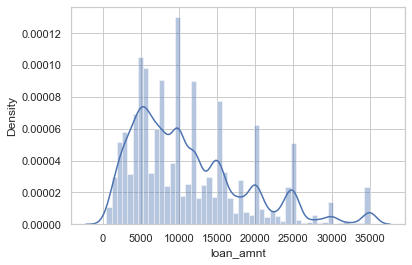

In [39]:
#checking distrbution of loan amount
sns.distplot(loan.loan_amnt)
plt.show()

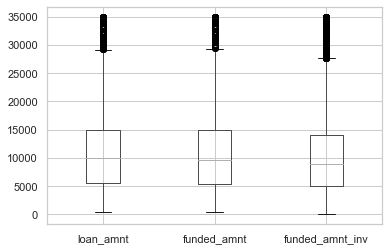

In [40]:
#checking if there are any outliers in the columns containing numerical values
loan.boxplot(column=['loan_amnt','funded_amnt','funded_amnt_inv']);

<AxesSubplot:>

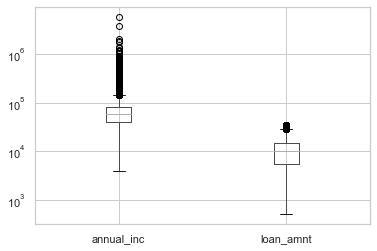

In [41]:
plt.yscale("log")
loan.boxplot(column=['annual_inc','loan_amnt'])

<AxesSubplot:>

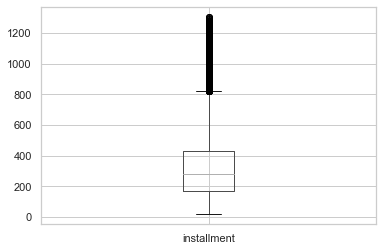

In [42]:
loan.boxplot(column=['installment'])

<AxesSubplot:>

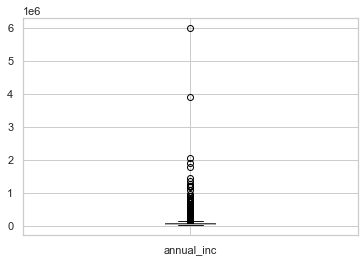

In [43]:
# plt.yscale("log")
loan.boxplot('annual_inc')

In [44]:
loan.describe()

loan_amnt   funded_amnt  funded_amnt_inv      int_rate  \
count  37541.000000  37541.000000  37541.000000     37541.000000   
mean   11119.771050  10853.980315  10281.190004     11.963580      
std    7354.173376   7096.389049   7033.976024      3.683037       
min    500.000000    500.000000    0.000000         5.420000       
25%    5500.000000   5400.000000   5000.000000      8.940000       
50%    10000.000000  9600.000000   8850.000000      11.830000      
75%    15000.000000  15000.000000  14075.000000     14.420000      
max    35000.000000  35000.000000  35000.000000     24.400000      

        installment    annual_inc           dti  issue_d_month  issue_d_year  
count  37541.000000  3.754100e+04  37541.000000  37541.000000   37541.000000  
mean   324.662009    6.940618e+04  13.284309     7.112996       2010.298767   
std    208.903386    6.467839e+04  6.660676      3.410241       0.888736      
min    15.690000     4.000000e+03  0.000000      1.000000       2007.000000   
25%    167.380000    4.100000e+04  8.160000      4.000000       2010.000000   
50%    280.000000    6.000000e+04  13.380000     7.000000       2011.000000   
75%    429.040000    8.300000e+04  18.550000     10.000000      2011.000000   
max    1305.190000   6.000000e+06  29.990000     12.000000      2011.000000

In [45]:
loan['annual_inc'].quantile(0.995)

300000.0

In [46]:
loan=loan[loan['annual_inc']<loan['annual_inc'].quantile(0.995)]

In [47]:
loan['annual_inc'].describe()

count    37326.000000 
mean     66745.680660 
std      37319.880387 
min      4000.000000  
25%      41000.000000 
50%      59500.000000 
75%      82000.000000 
max      294000.000000
Name: annual_inc, dtype: float64

In [48]:
#removing rows from "installment" after 99.5 percentile
loan = loan[loan["installment"] < loan["installment"].quantile(0.995)]
loan["installment"].describe()

count    37139.000000
mean     319.147635  
std      199.348065  
min      15.690000   
25%      166.630000  
50%      278.330000  
75%      423.035000  
max      1059.020000 
Name: installment, dtype: float64

In [49]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'issue_d_month',
       'issue_d_year'],
      dtype='object')

In [50]:
loan.shape

(37139, 21)

In [51]:
loan['purpose'].value_counts()

debt_consolidation    17486
credit_card           4855 
other                 3685 
home_improvement      2716 
major_purchase        2066 
small_business        1680 
car                   1446 
wedding               906  
medical               651  
moving                547  
vacation              348  
house                 345  
educational           316  
renewable_energy      92   
Name: purpose, dtype: int64

# Data Analysis

a. Univariate Analysis

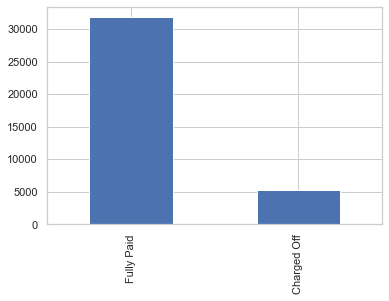

In [52]:
loan['loan_status'].value_counts().plot.bar()
plt.show()

From this above information
1. More than 30000 people have fully paid
2. 5000 people are Charged Off

In [53]:
#making a new dataframe for loans where status is Charged Off
charged_off_loans=loan.loc[loan['loan_status']=='Charged Off']
charged_off_loans['issue_d_year']=charged_off_loans['issue_d_year'].astype(int)

#making a new dataframe for loans where status is Fully Paid
fully_paid_loans = loan[loan['loan_status'] == "Fully Paid"]
fully_paid_loans['issue_d_year']=fully_paid_loans['issue_d_year'].astype(int)

In [54]:
#making a new dataframe for loans where status is charged off
loans_of_36_month_term=loan.loc[loan['term']==' 36 months']
loans_of_36_month_term['issue_d_year']=loans_of_36_month_term['issue_d_year'].astype(str)

#making a new dataframe for loans where status is Fully Paid
loans_of_60_month_term = loan[loan['term'] == ' 60 months']
loans_of_60_month_term['issue_d_year']=loans_of_60_month_term['issue_d_year'].astype(str)

In [55]:
charged_off_loans.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
1   2500       2500         2500.0            60 months  15.27      
8   5600       5600         5600.0            60 months  21.28      
9   5375       5375         5350.0            60 months  12.69      
12  9000       9000         9000.0            36 months  13.49      
14  10000      10000        10000.0           36 months  10.65      

    installment grade sub_grade                            emp_title  \
1   59.83        C     C4        Ryder                                 
8   152.39       F     F2        NA                                    
9   121.45       B     B5        Starbucks                             
12  305.38       C     C1        Va. Dept of Conservation/Recreation   
14  325.74       B     B2        SFMTA                                 

   emp_length home_ownership  annual_inc verification_status    issue_d  \
1   < 1 year   RENT           30000.0     Source Verified    2011-12-01   
8   4 years    OWN            40000.0     Source Verified    2011-12-01   
9   < 1 year   RENT           15000.0     Verified           2011-12-01   
12  < 1 year   RENT           30000.0     Source Verified    2011-12-01   
14  3 years    RENT           100000.0    Source Verified    2011-12-01   

    loan_status             purpose                                 title  \
1   Charged Off  car                 bike                                   
8   Charged Off  small_business      Expand Business & Buy Debt Portfolio   
9   Charged Off  other               Building my credit history.            
12  Charged Off  debt_consolidation  freedom                                
14  Charged Off  other               Other Loan                             

   addr_state    dti  issue_d_month  issue_d_year  
1   GA         1.00   12             2011          
8   CA         5.55   12             2011          
9   TX         18.08  12             2011          
12  VA         10.08  12             2011          
14  CA         7.06   12             2011

[Text(0.5, 0, 'Home Ownership'), Text(0, 0.5, 'No. of Loans')]

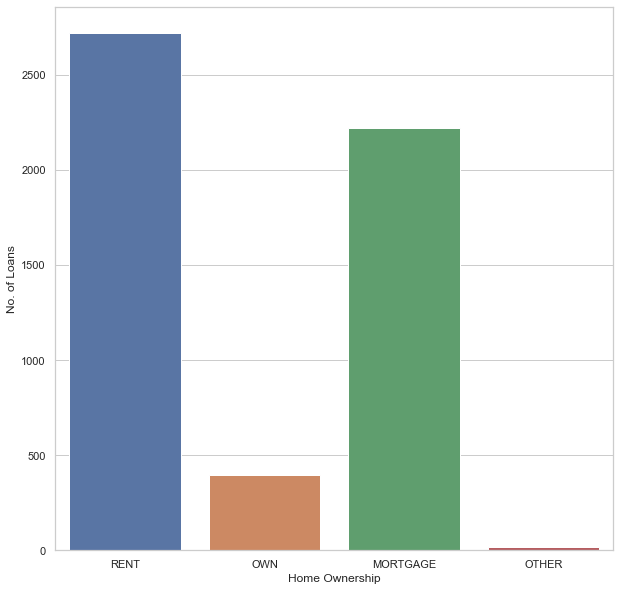

In [56]:
plt.figure(figsize=(10,10))
Hos = sns.countplot(charged_off_loans['home_ownership'])
Hos.set(xlabel='Home Ownership', ylabel='No. of Loans')

# Information from above data

Max people who are charged off are rented one

# Loan Status vs Loan Amount of charged off loans

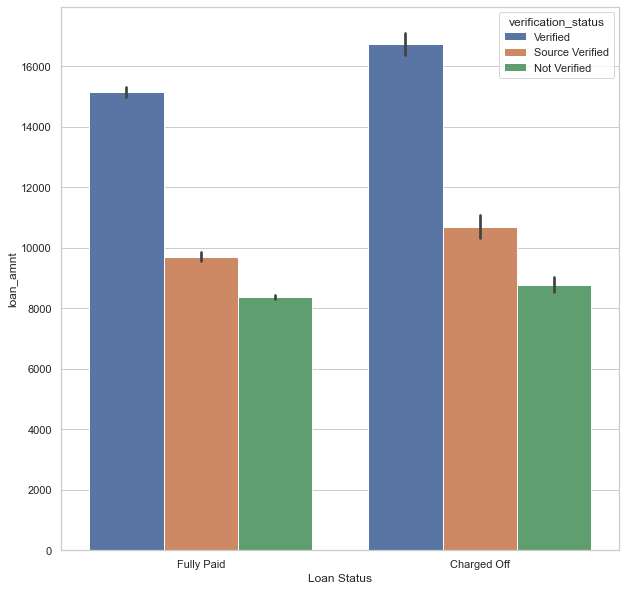

In [57]:
plt.figure(figsize=(10,10))
sns.barplot(x='loan_status',y='loan_amnt', hue='verification_status', data=loan)
plt.xlabel("Loan Status")
plt.show()

# Information from above Data

People who are highly verified are maximum Charged Off

<AxesSubplot:xlabel='term,loan_status'>

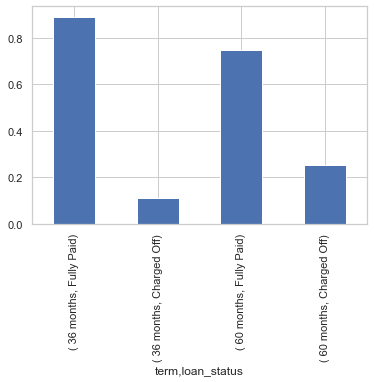

In [69]:
loan.groupby('term')['loan_status'].value_counts(1).plot.bar()

From above plot, people having loan for 60 month are having more Charged Off than of 36 month

In [76]:
loan.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0  5000       5000         4975.0            36 months  10.65     162.87        
1  2500       2500         2500.0            60 months  15.27     59.83         
2  2400       2400         2400.0            36 months  15.96     84.33         
3  10000      10000        10000.0           36 months  13.49     339.31        
5  5000       5000         5000.0            36 months  7.90      156.46        

  grade sub_grade             emp_title emp_length home_ownership  annual_inc  \
0  B     B2        NA                    10+ years  RENT           24000.0      
1  C     C4        Ryder                 < 1 year   RENT           30000.0      
2  C     C5        NA                    10+ years  RENT           12252.0      
3  C     C1        AIR RESOURCES BOARD   10+ years  RENT           49200.0      
5  A     A4        Veolia Transportaton  3 years    RENT           36000.0      

  verification_status    issue_d  loan_status         purpose  \
0  Verified           2011-12-01  Fully Paid   credit_card      
1  Source Verified    2011-12-01  Charged Off  car              
2  Not Verified       2011-12-01  Fully Paid   small_business   
3  Source Verified    2011-12-01  Fully Paid   other            
5  Source Verified    2011-12-01  Fully Paid   wedding          

                                   title addr_state    dti  issue_d_month  \
0  Computer                               AZ         27.65  12              
1  bike                                   GA         1.00   12              
2  real estate business                   IL         8.72   12              
3  personel                               CA         20.00  12              
5  My wedding loan I promise to pay back  AZ         11.20  12              

   issue_d_year  
0  2011          
1  2011          
2  2011          
3  2011          
5  2011

In [75]:
loan.groupby(['term', "grade","sub_grade"]).mean()

loan_amnt   funded_amnt  funded_amnt_inv  \
term       grade sub_grade                                                
 36 months A     A1         7306.285714   7292.309524   7246.017484       
                 A2         7339.381153   7221.536568   7087.991294       
                 A3         7838.208383   7647.166470   7349.888628       
                 A4         9133.771267   8909.480151   8628.552872       
                 A5         9423.329156   9197.723475   8852.745513       
           B     B1         9496.384565   9432.992866   8958.063505       
                 B2         9921.445856   9777.087114   9073.715316       
                 B3         10301.476145  10195.323571  9597.568354       
                 B4         9903.940678   9796.087571   9149.805136       
                 B5         9894.640063   9747.809077   9087.655608       
           C     C1         9088.614035   9039.631579   8206.474652       
                 C2         9208.950382   9175.725191   8360.786428       
                 C3         9179.068117   9105.534532   8065.940456       
                 C4         9312.827511   9189.792576   8196.705792       
                 C5         8726.341890   8611.785298   7621.628140       
           D     D1         9775.223964   9763.017917   8766.575701       
                 D2         10115.796178  10050.318471  9159.769541       
                 D3         10996.617162  10895.957096  9804.196484       
                 D4         11278.964059  11158.192389  10079.462723      
                 D5         11346.014493  11244.927536  10277.086603      
           E     E1         11828.228782  11771.217712  10504.594881      
                 E2         11293.654822  11010.279188  9343.477732       
                 E3         12531.774194  12531.774194  11011.076822      
                 E4         12934.223301  12575.728155  10099.087752      
                 E5         13054.891304  12959.510870  11569.996580      
           F     F1         13448.706897  13164.224138  11177.914204      
                 F2         14561.734694  14173.979592  11594.977016      
                 F3         15864.516129  15864.516129  12955.885719      
                 F4         11788.888889  11483.333333  9985.084618       
                 F5         15316.346154  14624.038462  13123.119395      
           G     G1         17663.157895  17663.157895  15454.606292      
                 G2         16266.666667  16266.666667  16231.825519      
                 G3         18125.000000  18125.000000  10384.680825      
                 G4         15888.888889  15888.888889  15224.060498      
                 G5         17367.500000  16292.500000  14836.945514      
 60 months A     A2         8183.928571   7682.142857   7217.641077       
                 A3         9974.358974   7899.358974   7670.006506       
                 A4         10309.482759  8652.370690   8423.264068       
                 A5         10401.904762  9057.380952   8719.938991       
           B     B1         10979.725610  10565.091463  10401.996914      
                 B2         12780.243446  12347.284644  12078.032700      
                 B3         15015.016502  14334.694719  14017.353726      
                 B4         15053.016529  13970.454545  13650.766840      
                 B5         15995.846645  15162.979233  14856.062817      
           C     C1         15297.739362  14566.578014  14222.449194      
                 C2         15398.728070  14690.964912  14414.174761      
                 C3         14820.025840  14197.157623  13820.491787      
                 C4         14330.976096  13923.505976  13782.667003      
                 C5         16151.581028  15680.632411  15210.236855      
           D     D1         19834.615385  19276.923077  17171.848784      
                 D2         13251.480263  12878.453947  12655.425104      
                 D3         13937.258065  13440.430108  

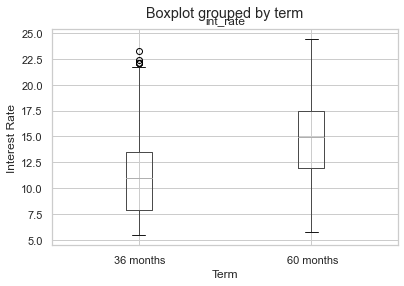

In [66]:
tr = loan.boxplot(column="int_rate",by = "term")
tr.set(xlabel='Term', ylabel='Interest Rate')
plt.show()

### From above plot , it is clear that interest rate for 60 months is heigher than 36 months

In [79]:
loan.groupby('term').describe().transpose()

term                       36 months      60 months
loan_amnt       count  27943.000000   9196.000000  
                mean   9462.044161    15510.898760 
                std    5979.381169    8362.589590  
                min    500.000000     1000.000000  
                25%    5000.000000    9000.000000  
                50%    8000.000000    14675.000000 
                75%    12000.000000   20000.000000 
                max    35000.000000   35000.000000 
funded_amnt     count  27943.000000   9196.000000  
                mean   9337.427978    14821.634406 
                std    5878.016535    7960.139025  
                min    500.000000     1000.000000  
                25%    5000.000000    9000.000000  
                50%    8000.000000    14000.000000 
                75%    12000.000000   20000.000000 
                max    32400.000000   35000.000000 
funded_amnt_inv count  27943.000000   9196.000000  
                mean   8696.969973    14456.327275 
                std    5789.163866    7761.445017  
                min    0.000000       950.000000   
                25%    4500.000000    8475.000000  
                50%    7475.000000    13475.000000 
                75%    11950.000000   19700.000000 
                max    32150.000000   35000.000000 
int_rate        count  27943.000000   9196.000000  
                mean   11.011945      14.785066    
                std    3.209575       3.540414     
                min    5.420000       5.790000     
                25%    7.900000       11.990000    
                50%    10.990000      14.910000    
                75%    13.470000      17.490000    
                max    23.220000      24.400000    
installment     count  27943.000000   9196.000000  
                mean   307.187822     355.488766   
                std    197.275680     201.211964   
                min    15.690000      19.870000    
                25%    161.130000     202.342500   
                50%    262.130000     322.105000   
                75%    403.170000     474.580000   
                max    1059.020000    1005.060000  
annual_inc      count  27943.000000   9196.000000  
                mean   64842.070165   71299.542067 
                std    36524.219672   37895.006220 
                min    4000.000000    6000.000000  
                25%    40000.000000   45000.000000 
                50%    56800.000000   62500.000000 
                75%    80000.000000   87123.000000 
                max    294000.000000  290000.000000
dti             count  27943.000000   9196.000000  
                mean   13.024064      14.247777    
                std    6.657580       6.530738     
                min    0.000000       0.000000     
                25%    7.860000       9.440000     
                50%    13.050000      14.420000    
                75%    18.260000      19.400000    
                max    29.990000      29.890000    
issue_d_month   count  27943.000000   9196.000000  
                mean   7.039688       7.317094     
                std    3.462236       3.243856     
                min    1.000000       1.000000     
                25%    4.000000       5.000000     
                50%    7.000000       8.000000     
                75%    10.000000      10.000000    
                max    12.000000      12.000000    
issue_d_year    count  27943.000000   9196.000000  
                mean   2010.170204    2010.675946  
                std    0.957446       0.468046     
                min    2007.000000    2010.000000  
                25%    2010.000000    2010.000000  
                50%    2010.000000    2011.000000  
                75%    2011.000000    2011.000000  
                max    2011.000000    2011.000000